In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
std = pd.read_csv('StudentPerformanceFactors.csv')

In [18]:
std.shape

(6607, 20)

In [6]:
std.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [7]:
std.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

The variables of interest are 'Hours_Studied' and 'Exam_Score'

In [20]:
std = std[[ 'Hours_Studied', 'Exam_Score']]

In [21]:
std.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


In [29]:
std.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.446514
Exam_Score,0.446514,1.000000


In [28]:
std.describe()

,Hours_Studied,Exam_Score
count,6606.000000,6606.000000
mean,19.974266,67.230548
std,5.990424,3.868502
min,1.000000,55.000000
25%,16.000000,65.000000
50%,20.000000,67.000000
75%,24.000000,69.000000
max,44.000000,100.000000


In [50]:
std = std[~((std['Exam_Score']>100.00) | (std['Exam_Score']>80))]

In [52]:
std.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.517234
Exam_Score,0.517234,1.000000


<Axes: xlabel='Exam_Score', ylabel='Count'>

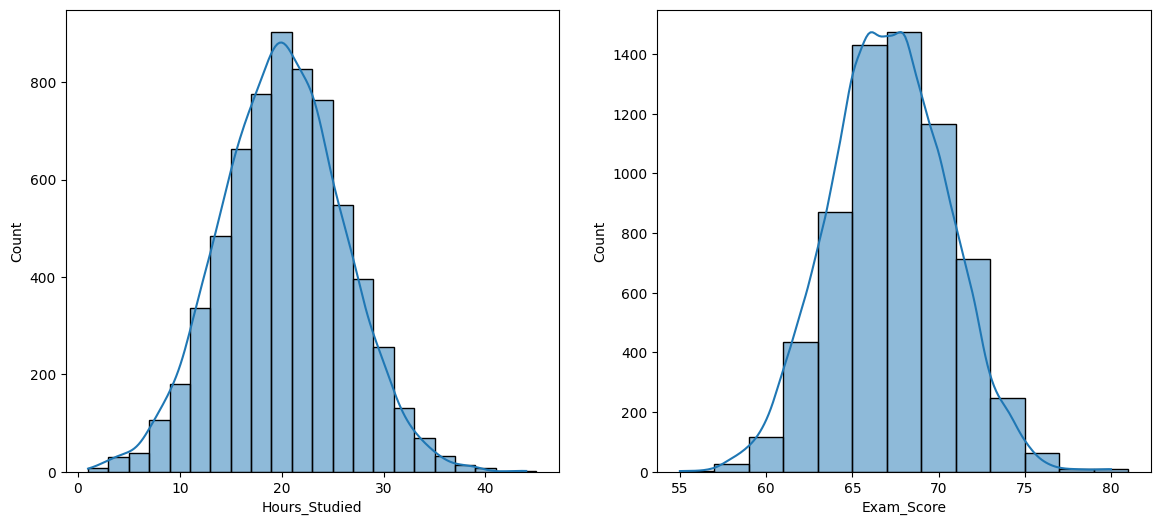

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sea.histplot(data = std, x = 'Hours_Studied', binwidth=2, kde = True,ax=ax1)
sea.histplot(data = std, x = 'Exam_Score', binwidth=2, kde = True,ax=ax2)

## Data preparing

In [53]:
X = np.array(std['Hours_Studied'])

In [54]:
print(X)

[23 19 24 ... 20 10 15]


In [55]:
X = X.reshape(-1,1)

In [56]:
print(X)

[[23]
 [19]
 [24]
 ...
 [20]
 [10]
 [15]]


In [57]:
Y = std['Exam_Score']

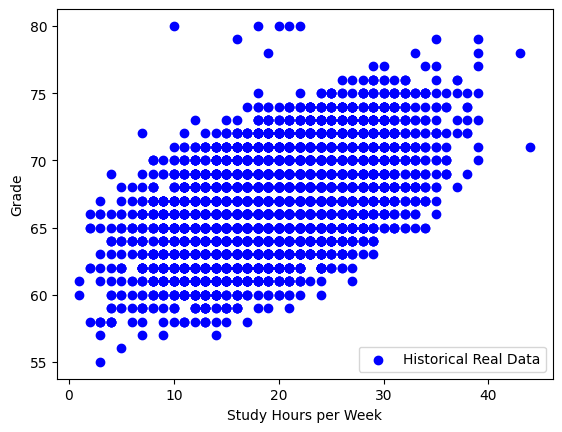

In [58]:
plt.scatter(X,Y,color = 'b', label = 'Historical Real Data')
plt.xlabel('Study Hours per Week')
plt.ylabel('Grade')
plt.legend()
plt.show()

## Training and testing

In [70]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, 
                               test_size=0.3, random_state=42)

In [65]:
Xtrain.shape

(4594, 1)

In [66]:
Xtest.shape

(1970, 1)

In [62]:
model = LinearRegression()

In [67]:
model.fit(Xtrain,Ytrain)

LinearRegression()

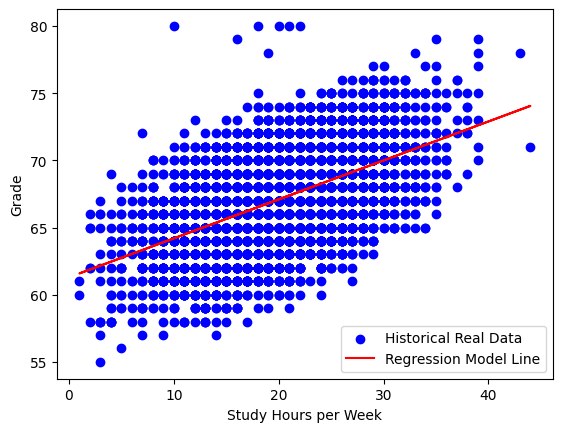

In [68]:
plt.scatter(X,Y, color = 'b', label = 'Historical Real Data ')
plt.plot(X, model.predict(X), color = 'r', label = 'Regression Model Line')
plt.xlabel('Study Hours per Week')
plt.ylabel('Grade')
plt.legend()
plt.show()


In [69]:
#evaluating the model with test data

score = model.score(Xteste,Yteste)
print(f"R² Coef: {score:.2f}")

R² Coef: 0.28
